# Imports

The reference is based on the following Keras implementation

https://keras.io/examples/nlp/text_classification_with_transformer/

In [1]:
pip install -q datasets

     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 212 kB 45.8 MB/s 
     |████████████████████████████████| 136 kB 46.1 MB/s 
     |████████████████████████████████| 127 kB 47.6 MB/s 
     |████████████████████████████████| 271 kB 39.9 MB/s 
     |████████████████████████████████| 144 kB 39.7 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
pip install -q transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 30.9 MB/s 
     |████████████████████████████████| 895 kB 35.8 MB/s 
     |████████████████████████████████| 6.6 MB 34.6 MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#from datasets import load_dataset
#sst2 = load_dataset('glue', 'sst2')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#sst2

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [5]:
import pandas as pd
import numpy as np

In [8]:
train = pd.read_csv('train.tsv',sep='\t')
valid = pd.read_csv('dev.tsv',sep='\t')
test = pd.read_csv('test.tsv',sep='\t')

In [9]:
train

,comment_text,label
0,one of the more influential works of the ` kor...,1.0
1,incurably romantic,1.0
2,"and your reward will be a thoughtful , emotion...",1.0
3,to creep the living hell out of you,0.0
4,in this flat effort,0.0
...,...,...
37129,tenacious,1.0
37130,nothing more than four or five mild chuckles,0.0
37131,well edited so that it certainly does n't feel...,1.0
37132,less entertaining,0.0


In [ ]:
train_small = sst2["train"].shuffle(seed=1002).select([i for i in list(range(int(len(sst2["train"]))))])
valid_small = sst2["validation"].select([i for i in list(range(int(len(sst2["validation"])*0.5)))])
test_small = sst2["validation"].select([i for i in list(range(int(len(sst2["validation"])*0.5),int(len(sst2["validation"])*1)))])

In [ ]:
checkpoint = "bert-base-uncased"
from transformers import AutoTokenizer, DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
def tokenize_function(x):
    return tokenizer(x["sentence"], truncation=True)#return_tensors = 'pt'

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
tokenized_train = train_small.map(tokenize_function, batched=True)
tokenized_valid = valid_small.map(tokenize_function, batched=True)
tokenized_test = test_small.map(tokenize_function, batched=True)

  0%|          | 0/68 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_train

Dataset({
    features: ['sentence', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 67349
})

In [ ]:
type(tokenized_train["sentence"])

list

In [ ]:
tokenizer = Tokenizer(num_words = 20000)
def keras_tokenizer(x):
  tokenizer.fit_on_texts(x["sentence"])
  return tokenizer.texts_to_sequences(x["sentence"])

In [ ]:
train_x_hf = keras_tokenizer(tokenized_train)
valid_x_hf = keras_tokenizer(tokenized_valid)
test_x_hf = keras_tokenizer(tokenized_test)

In [ ]:
#Use input_ids as the pre-processed
#tokenized_train["input_ids"][:5]
'''
import numpy as np
train_x_hf = np.array(tokenized_train["input_ids"])
valid_x_hf = np.array(tokenized_valid["input_ids"])
test_x_hf = np.array(tokenized_test["input_ids"])
'''

'\nimport numpy as np\ntrain_x_hf = np.array(tokenized_train["input_ids"])\nvalid_x_hf = np.array(tokenized_valid["input_ids"])\ntest_x_hf = np.array(tokenized_test["input_ids"])\n'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_y_hf = np.array(tokenized_train["label"])
valid_y_hf = np.array(tokenized_valid["label"])
test_y_hf = np.array(tokenized_test["label"])

# Transformer Block

Initial Block

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
    #Initialize
      super(TransformerBlock, self).__init__()
      self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
      self.ffn = keras.Sequential(
          [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
      )
    #Normalization
      self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
      self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
      #Set the dropout rate
      self.dropout1 = layers.Dropout(rate)
      self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
    #Goes through attention -> dropout -> normalization -> feed-forward network -> dropout
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) #return the normalized layer

In [ ]:
 class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
      #Initialize
        super(TokenAndPositionEmbedding, self).__init__()
        #Embedding the tokens
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        #Embedding the positions
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# Training

 For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=1000)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
import numpy as np
len(np.unique(x_train))

24898

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(train_x_hf, maxlen=128)
x_val = keras.preprocessing.sequence.pad_sequences(valid_x_hf, maxlen=128)
x_test = keras.preprocessing.sequence.pad_sequences(test_x_hf, maxlen=128)

In [ ]:
len(x_train)
len(train_y_hf)

67349

In [ ]:
len(x_val)
len(valid_y_hf)

436

In [ ]:
len(np.unique(x_train))

13823

# Real Train

Issue - need the num_words to categorize

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(train_x_hf, maxlen=128)
x_val = keras.preprocessing.sequence.pad_sequences(valid_x_hf, maxlen=128)
x_test = keras.preprocessing.sequence.pad_sequences(test_x_hf, maxlen=128)

In [ ]:
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")

67349 Training sequences
436 Validation sequences


In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 16  # Hidden layer size in feed forward network inside transformer

maxlen = 128
vocab_size = 20000

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, train_y_hf, batch_size=32, epochs=8, validation_data=(x_val, valid_y_hf)
)

Epoch 1/8
2105/2105 [==============================] - 34s 14ms/step - loss: 0.4326 - accuracy: 0.7782 - val_loss: 1.1020 - val_accuracy: 0.5367
Epoch 2/8
2105/2105 [==============================] - 28s 13ms/step - loss: 0.2031 - accuracy: 0.9232 - val_loss: 1.5310 - val_accuracy: 0.5092
Epoch 3/8
2105/2105 [==============================] - 28s 13ms/step - loss: 0.1523 - accuracy: 0.9406 - val_loss: 1.7224 - val_accuracy: 0.5183
Epoch 4/8
2105/2105 [==============================] - 28s 14ms/step - loss: 0.1241 - accuracy: 0.9495 - val_loss: 1.9796 - val_accuracy: 0.5000
Epoch 5/8
2105/2105 [==============================] - 28s 13ms/step - loss: 0.1081 - accuracy: 0.9549 - val_loss: 2.0426 - val_accuracy: 0.4954
Epoch 6/8
2105/2105 [==============================] - 28s 13ms/step - loss: 0.0969 - accuracy: 0.9586 - val_loss: 2.6573 - val_accuracy: 0.4931
Epoch 7/8
2105/2105 [==============================] - 28s 13ms/step - loss: 0.0888 - accuracy: 0.9615 - val_loss: 2.3188 - val_ac

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 token_and_position_embeddin  (None, 128, 32)          644096    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 128, 32)          9616      
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

In [ ]:
from matplotlib import pyplot as plt

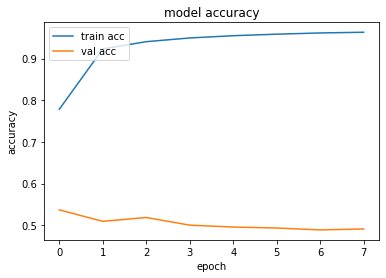

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc', 'val acc'], loc='upper left')
plt.show()

In [ ]:
model.save('/content')

INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


# Make prediction

In [ ]:
preds = model.predict(x_test)

In [ ]:
gt = np.array(test_y_hf)#[:25])

In [ ]:
pred_final = np.empty([len(preds)])

In [ ]:
pred_final[0]

3.611725166e-315

In [ ]:
#Need conversion
for i,x in enumerate(preds):
  if x[0]>x[1]:
    pred_final[i] = 1
  else:
    pred_final[i] = 0

In [ ]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Prediction Accuracy is",sklearn.metrics.accuracy_score(gt,pred_final))

print(classification_report(gt, pred_final))
print("\n\n")
print(confusion_matrix(gt, pred_final))

Prediction Accuracy is 0.48394495412844035
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       220
           1       0.48      0.46      0.47       216

    accuracy                           0.48       436
   macro avg       0.48      0.48      0.48       436
weighted avg       0.48      0.48      0.48       436




[[112 108]
 [117  99]]
